In [164]:
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit
from numpy import pi
from qiskit import IBMQ, Aer, assemble, transpile
from qiskit.visualization import plot_histogram
from qiskit.providers.ibmq import least_busy
from qiskit.circuit.library import ZGate

In [165]:
def oracle(circuit, state):
    circuit.ccx(qreg_q[0], qreg_q[1], qreg_q[5])
    circuit.ccx(qreg_q[2], qreg_q[3], qreg_q[6])
    circuit.ccx(qreg_q[5], qreg_q[6], qreg_q[7])
    #circuit.cu(pi, 0, 0, 0, qreg_q[7], qreg_q[4])
    #circuit.append(ZGate().control(4), [qreg_q[7]])
    circuit.cz(qreg_q[7], qreg_q[4])
    circuit.ccx(qreg_q[5], qreg_q[6], qreg_q[7])
    circuit.ccx(qreg_q[2], qreg_q[3], qreg_q[6])
    circuit.ccx(qreg_q[0], qreg_q[1], qreg_q[5])
    
    # Set the state here
    for ii, qubit in enumerate(state):
        #print('qubit ' , qubit)
        if qubit == 0:
            circuit.x(qreg_q[len(state) - 1 - ii])

    return circuit

In [166]:
def diffusion(circuit, state):
    circuit.barrier(qreg_q[0], qreg_q[1], qreg_q[2], qreg_q[3], qreg_q[4], qreg_q[5], qreg_q[6], qreg_q[7])
    
    circuit.h(qreg_q[0])
    circuit.h(qreg_q[1])
    circuit.h(qreg_q[2])
    circuit.h(qreg_q[3])
    circuit.h(qreg_q[4])
    circuit.x(qreg_q[0])
    circuit.x(qreg_q[1])
    circuit.x(qreg_q[2])
    circuit.x(qreg_q[3])
    circuit.x(qreg_q[4])
    
    circuit = oracle(circuit, state)
    circuit.barrier(qreg_q[0], qreg_q[1], qreg_q[2], qreg_q[3], qreg_q[4], qreg_q[5], qreg_q[6], qreg_q[7])
        
    circuit.x(qreg_q[0])
    circuit.x(qreg_q[1])
    circuit.x(qreg_q[2])
    circuit.x(qreg_q[3])
    circuit.x(qreg_q[4])
    circuit.h(qreg_q[0])
    circuit.h(qreg_q[1])
    circuit.h(qreg_q[2])
    circuit.h(qreg_q[3])
    circuit.h(qreg_q[4])

    circuit.barrier(qreg_q[0], qreg_q[1], qreg_q[2], qreg_q[3], qreg_q[4], qreg_q[5], qreg_q[6], qreg_q[7])
    
    return circuit

In [224]:
qreg_q = QuantumRegister(8, 'q')
creg_c = ClassicalRegister(5, 'c')
grover_circuit = QuantumCircuit(qreg_q, creg_c)

In [225]:
# Superposition
grover_circuit.h(qreg_q[0])
grover_circuit.h(qreg_q[1])
grover_circuit.h(qreg_q[2])
grover_circuit.h(qreg_q[3])
grover_circuit.h(qreg_q[4])

grover_circuit.barrier(qreg_q[0], qreg_q[1], qreg_q[2], qreg_q[3], qreg_q[4], qreg_q[5], qreg_q[6], qreg_q[7])

In [226]:
SEARCH_STATE = [1,0,1,1,0]
ROTATIONS = 2
default = [1,1,1,1,1]

In [227]:
#grover_circuit.x(qreg_q[2])

for ii in range(ROTATIONS):
    grover_circuit = oracle(grover_circuit, SEARCH_STATE)
    #grover_circuit.x(qreg_q[3])
    grover_circuit.barrier(qreg_q[0], qreg_q[1], qreg_q[2], qreg_q[3], qreg_q[4], qreg_q[5], qreg_q[6], qreg_q[7])
    grover_circuit = diffusion(grover_circuit, default)

'''
grover_circuit = oracle(grover_circuit)
grover_circuit.barrier(qreg_q[0], qreg_q[1], qreg_q[2], qreg_q[3], qreg_q[4], qreg_q[5], qreg_q[6], qreg_q[7])
grover_circuit = diffusion(grover_circuit)

grover_circuit = oracle(grover_circuit)
grover_circuit.barrier(qreg_q[0], qreg_q[1], qreg_q[2], qreg_q[3], qreg_q[4], qreg_q[5], qreg_q[6], qreg_q[7])
grover_circuit = diffusion(grover_circuit)

grover_circuit = oracle(grover_circuit)
grover_circuit.barrier(qreg_q[0], qreg_q[1], qreg_q[2], qreg_q[3], qreg_q[4], qreg_q[5], qreg_q[6], qreg_q[7])
grover_circuit = diffusion(grover_circuit)

grover_circuit = oracle(grover_circuit)
grover_circuit.barrier(qreg_q[0], qreg_q[1], qreg_q[2], qreg_q[3], qreg_q[4], qreg_q[5], qreg_q[6], qreg_q[7])
grover_circuit = diffusion(grover_circuit)
'''

'\ngrover_circuit = oracle(grover_circuit)\ngrover_circuit.barrier(qreg_q[0], qreg_q[1], qreg_q[2], qreg_q[3], qreg_q[4], qreg_q[5], qreg_q[6], qreg_q[7])\ngrover_circuit = diffusion(grover_circuit)\n\ngrover_circuit = oracle(grover_circuit)\ngrover_circuit.barrier(qreg_q[0], qreg_q[1], qreg_q[2], qreg_q[3], qreg_q[4], qreg_q[5], qreg_q[6], qreg_q[7])\ngrover_circuit = diffusion(grover_circuit)\n\ngrover_circuit = oracle(grover_circuit)\ngrover_circuit.barrier(qreg_q[0], qreg_q[1], qreg_q[2], qreg_q[3], qreg_q[4], qreg_q[5], qreg_q[6], qreg_q[7])\ngrover_circuit = diffusion(grover_circuit)\n\ngrover_circuit = oracle(grover_circuit)\ngrover_circuit.barrier(qreg_q[0], qreg_q[1], qreg_q[2], qreg_q[3], qreg_q[4], qreg_q[5], qreg_q[6], qreg_q[7])\ngrover_circuit = diffusion(grover_circuit)\n'

In [228]:
#grover_circuit.draw()

In [229]:
sim = Aer.get_backend('aer_simulator')
# we need to make a copy of the circuit with the 'save_statevector'
# instruction to run on the Aer simulator
grover_circuit_sim = grover_circuit.copy()
grover_circuit_sim.save_statevector()
qobj = assemble(grover_circuit_sim)

In [230]:
#result = sim.run(qobj).result()
#statevec = result.get_statevector()
#from qiskit_textbook.tools import vector2latex
#vector2latex(statevec, pretext="|\\psi\\rangle =")

In [231]:
#grover_circuit.x(qreg_q[2])

In [232]:
grover_circuit.measure([0,1,2,3,4],[0,1,2,3,4])
aer_sim = Aer.get_backend('aer_simulator')
qobj = assemble(grover_circuit)
result = aer_sim.run(qobj).result()
#grover_circuit.draw()

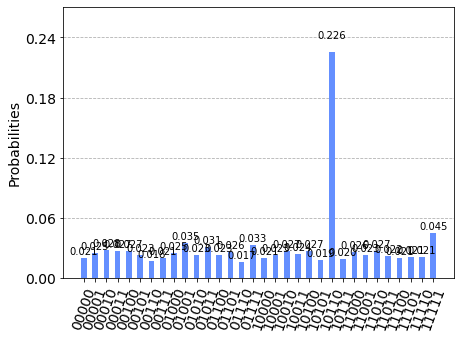

In [233]:
counts = result.get_counts()
plot_histogram(counts)

In [234]:
counts_d = dict(counts)
for w in sorted(counts_d, key=counts_d.get, reverse=True):
    print(w, counts_d[w])


10110 231
11111 46
01001 36
01111 34
01011 32
00010 29
11010 28
10100 28
10010 28
00011 28
00100 28
11000 27
01101 27
01000 26
00001 26
10011 25
01100 24
11001 24
00101 24
10001 24
01010 24
11011 23
11110 22
11101 22
11100 21
10000 21
00111 21
00000 21
10111 20
10101 19
00110 18
01110 17


# Real devices

In [86]:
# Load IBM Q account and get the least busy backend device
provider = IBMQ.load_account()
provider = IBMQ.get_provider("ibm-q")
device = least_busy(provider.backends(filters=lambda x: x.configuration().n_qubits >= 6 and 
                                   not x.configuration().simulator and x.status().operational==True))
print("Running on current least busy device: ", device)

ibmqfactory.load_account:WARNING:2022-08-15 10:36:28,126: Credentials are already in use. The existing account in the session will be replaced.


Running on current least busy device:  ibm_oslo


In [87]:
# Run our circuit on the least busy backend. Monitor the execution of the job in the queue
from qiskit.tools.monitor import job_monitor
transpiled_grover_circuit = transpile(grover_circuit, device, optimization_level=3)
job = device.run(transpiled_grover_circuit)
job_monitor(job, interval=2)

Traceback (most recent call last):
  Input In [87] in <cell line: 3>
    transpiled_grover_circuit = transpile(grover_circuit, device, optimization_level=3)
  File /opt/conda/lib/python3.8/site-packages/qiskit/compiler/transpiler.py:319 in transpile
    _check_circuits_coupling_map(circuits, cmap_conf, backend)
  File /opt/conda/lib/python3.8/site-packages/qiskit/compiler/transpiler.py:381 in _check_circuits_coupling_map
    raise TranspilerError(
TranspilerError: 'Number of qubits (10) in circuit-95 is greater than maximum (7) in the coupling_map'

Use %tb to get the full traceback.


In [ ]:
# Get the results from the computation
results = job.result()
answer = results.get_counts(grover_circuit)
plot_histogram(answer)